# **Imports**

In [1]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, MaxPooling2D

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from skimage.transform import resize

import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# **Data Loader**

In [2]:
dir_train = './train'
dir_test = './test'

In [3]:
CATEGORIES = os.listdir(dir_test)[:10] # get the last 10 values in the folder
CATEGORIES

['Acne and Rosacea Photos',
 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
 'Atopic Dermatitis Photos',
 'Bullous Disease Photos',
 'Cellulitis Impetigo and other Bacterial Infections',
 'Eczema Photos',
 'Exanthems and Drug Eruptions',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Herpes HPV and other STDs Photos',
 'Light Diseases and Disorders of Pigmentation']

In [4]:
NUM_CATEGORIES = len(CATEGORIES)
NUM_CATEGORIES

10

The shape of the image in category Eczema Photos is: (720, 477, 3)
The shape of the image in category Atopic Dermatitis Photos is: (720, 465, 3)
The shape of the image in category Bullous Disease Photos is: (603, 720, 3)
The shape of the image in category Exanthems and Drug Eruptions is: (720, 474, 3)
The shape of the image in category Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions is: (474, 720, 3)
The shape of the image in category Acne and Rosacea Photos is: (463, 720, 3)
The shape of the image in category Cellulitis Impetigo and other Bacterial Infections is: (720, 577, 3)
The shape of the image in category Melanoma Skin Cancer Nevi and Moles is: (572, 720, 3)
The shape of the image in category Herpes HPV and other STDs Photos is: (470, 720, 3)
The shape of the image in category Seborrheic Keratoses and other Benign Tumors is: (472, 720, 3)


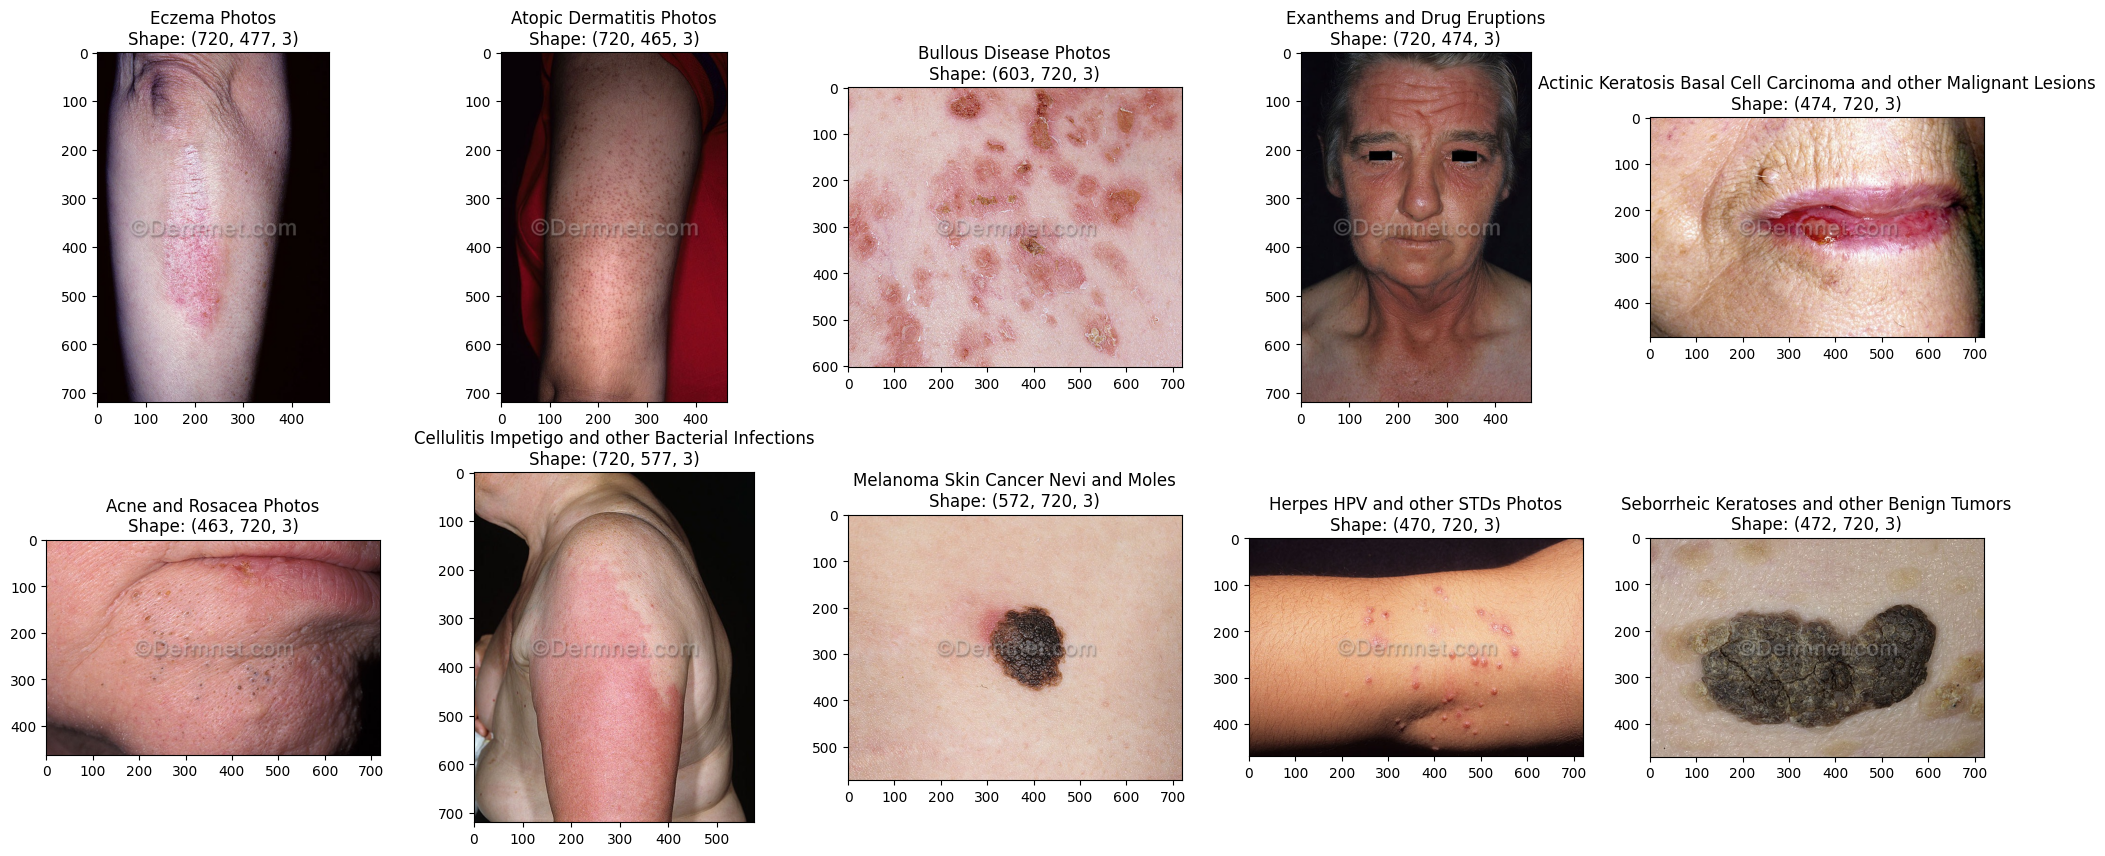

In [ ]:
# Set up a subplot with 3 rows and 4 columns (adjust as needed)
fig, axs = plt.subplots(2, 5, figsize=(25, 10))

# Flatten the 3x4 array of subplots into a 1D array
axs = axs.flatten()

# Loop through each category and plot the shape of one image from that category
for i, categorie in enumerate(CATEGORIES):
    # Get the list of image paths for the current category
    path_train = os.path.join(dir_train, categorie)

    # Select a random image from the category
    random_img = random.choice(os.listdir(path_train))

    # Load the image using matplotlib
    img = plt.imread(os.path.join(path_train, random_img))

    # Get and print the shape of the image
    image_shape = np.shape(img)
    print(f"The shape of the image in category {categorie} is: {image_shape}")

    # Display the image with a title
    axs[i].imshow(img)
    axs[i].set_title(f"{categorie}\nShape: {image_shape}")

plt.show()

In [5]:
input_shape = (224, 224)

In [6]:
# train_dict = {"image": [], "categorie": []}
imgs = []
label = []

for categorie in CATEGORIES:
  # path from each categorie
  path_test = os.path.join(dir_test, categorie)
  path_train = os.path.join(dir_train, categorie)

  # save all imgs from each categorie
  for image in os.listdir(path_test)[:600]:
    images = plt.imread(os.path.join(path_test, image))
    images = cv2.resize(images, input_shape)

    imgs.append(images)
    label.append(CATEGORIES.index(categorie))

  for image in os.listdir(path_train)[:600]:
    images = plt.imread(os.path.join(path_train, image))
    images = resize(images, input_shape, mode='constant', preserve_range=True)

    imgs.append(images)
    label.append(CATEGORIES.index(categorie))

In [7]:
from collections import Counter

# function to count the number of images in each categorie
def count_label(list):
  occurrences = Counter(list)
  sort_values = dict(sorted(occurrences.items())) # sort the values by index

  for k, value in sort_values.items():
    print(f'{k}: {value}')

print('Total of imagens: ', len(imgs))
print('Images shape: ', imgs[0].shape)
print('Images type: ', imgs[0].dtype)
print('Total of imagens to each categorie:')
count_label(label)


Total of imagens:  6265
Images shape:  (224, 224, 3)
Images type:  uint8
Total of imagens to each categorie:
0: 912
1: 888
2: 612
3: 561
4: 361
5: 909
6: 505
7: 299
8: 507
9: 711


# Categories

* 0: Cellulitis Impetigo and other Bacterial Infections
* 1: Atopic Dermatitis Photos
* 2: Eczema Photos
* 3: Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions
* 4: Bullous Disease Photos
* 5: Exanthems and Drug Eruptions
* 6: Acne and Rosacea Photos
* 7: Light Diseases and Disorders of Pigmentation
* 8: Poison Ivy Photos and other Contact Dermatitis
* 9: Hair Loss Photos Alopecia and other Hair Diseases
* 10: Seborrheic Keratoses and other Benign Tumors
* 11: Herpes HPV and other STDs Photos
* 12: Lupus and other Connective Tissue diseases
* 13: Scabies Lyme Disease and other Infestations and Bites
* 14: Melanoma Skin Cancer Nevi and Moles

In [ ]:
target_dict={k: v for v, k in enumerate(np.unique(label))}
target_val=  [target_dict[label[i]]
              for i in range(len(label))]

In [ ]:
target_dict

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9}

# Split dataset in Train, Test, and Validation

Train: 70 %

Test: 10%

Validation: 20%

In [7]:
# Getting 30% of the imagens and putting in Test
X_train, X_test, Y_train, Y_test = train_test_split(imgs, label, test_size=0.3, random_state=42, shuffle=True, stratify=label)

X_test = np.array(X_test)
X_train = np.array(X_train)
Y_test = np.array(Y_test)
Y_train = np.array(Y_train)

#Normalização
X_train = X_train / 255.0
X_test = X_test / 255.0

# codificacao da saída (one-hot encoding)
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

print('Train size:', len(X_train))
print(X_train.shape)
print('Test size:', len(X_test))
print(X_test.shape)

Train size: 4385
(4385, 224, 224, 3)
Test size: 1880
(1880, 224, 224, 3)


In [ ]:
print('Total of imagens to each categorie in Test:')
count_label(Y_test)

In [ ]:
print('Total of imagens to each categorie in Train:')
count_label(Y_train)

# Model

In [8]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D, BatchNormalization, Activation


model = Sequential()

model.add(Conv2D(128, (3, 3), input_shape=(224,224,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))

model.add(Conv2D(32, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model.add(Dropout(0.4))

model.add(GlobalAveragePooling2D())

# Flattening
model.add(Flatten())

# Full connection - Classificação
model.add(Dense(256))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dropout(0.4))

model.compile(optimizer = Adam(learning_rate=0.0001) , loss = "categorical_crossentropy", metrics = ["accuracy"])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 512)     14336     
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 128)     589952    
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                 

# Treinamento

In [10]:
history = model.fit(X_train, Y_train, epochs=10, batch_size = 64, validation_data=(X_test, Y_test))

Epoch 1/10
 3/69 [>.............................] - ETA: 8:28:32 - loss: 8.2051 - accuracy: 0.0990

In [ ]:
%%capture
!pip install visualkeras

In [ ]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("arial.ttf", 40)

visualkeras.layered_view(model, legend=True, font=font, spacing=20).show()

# Acurácia e Loss

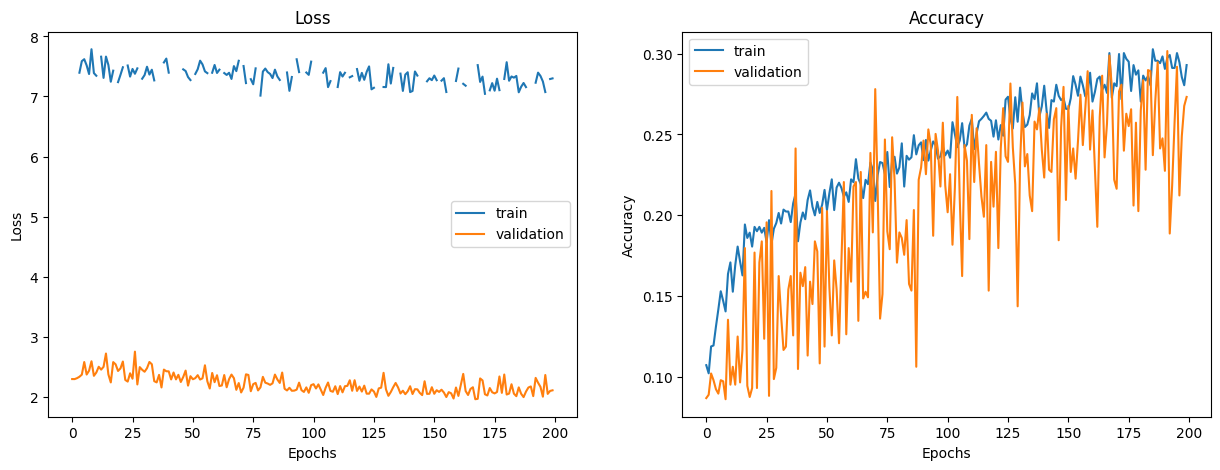

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend();
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend();

In [ ]:
print ('Loss and Accuracy:')
model.evaluate(X_test, Y_test)

Loss and Accuracy:
46/46 [==============================] - 18s 400ms/step - loss: 2.1096 - accuracy: 0.2732


[2.1095666885375977, 0.2732316255569458]

# Matriz de Confusão

46/46 [==============================] - 18s 386ms/step


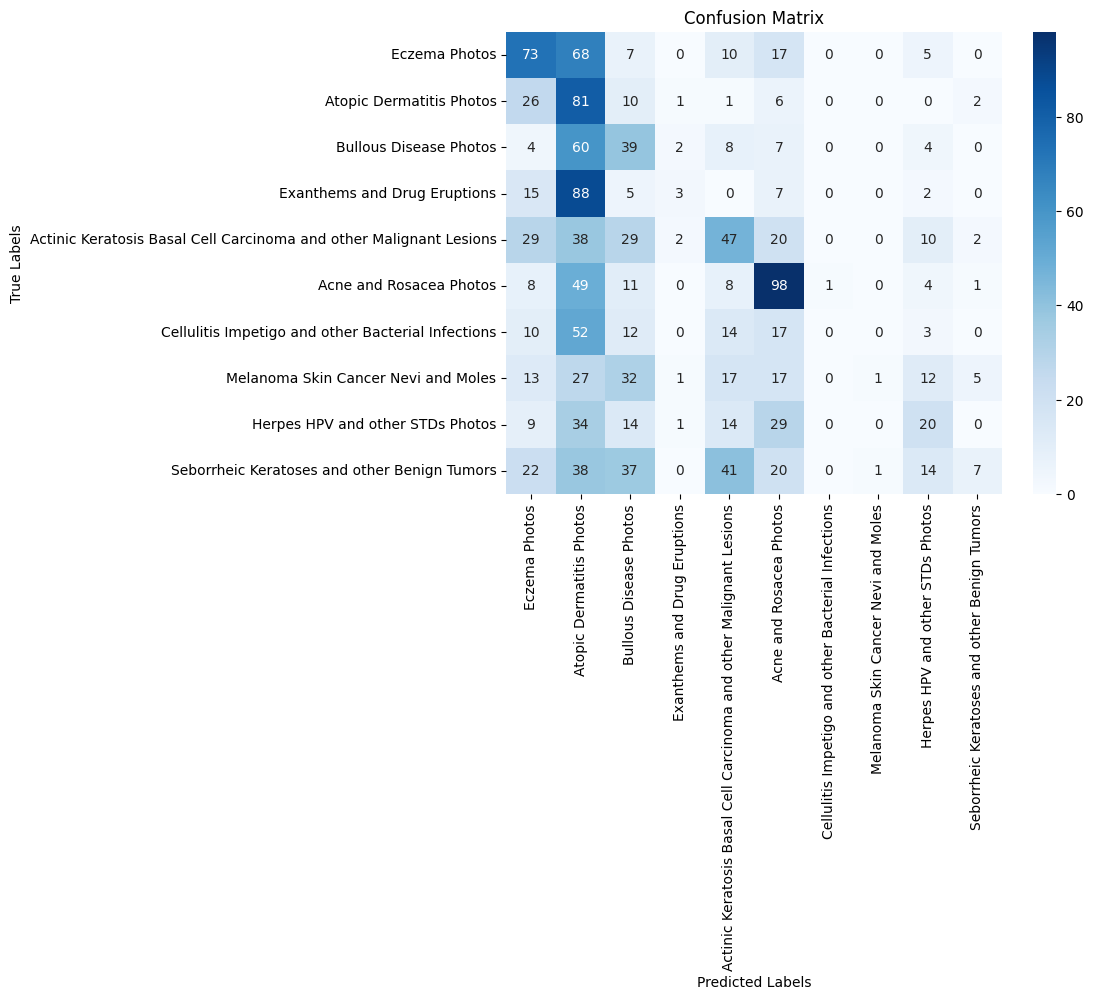

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = np.round(y_pred)

cmat=confusion_matrix(Y_test.argmax(axis=1),y_pred.argmax(axis=1))
cm_df = pd.DataFrame(cmat)

cmat_df = pd.DataFrame(cmat,
                     index = [CATEGORIES],
                     columns = [CATEGORIES])

plt.figure(figsize=(8,6))
sns.heatmap(cmat_df, annot=True,fmt="d",cmap=plt.cm.Blues )
plt.title('Confusion Matrix')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
tp = cmat[1][1] # True positive
fp = cmat[0][1] # False positive
tn = cmat[0][0] # True negative
fn = cmat[1][0] # False negative

accuracy = ((tp+tn)*100)/np.sum(cmat)
precision = (tp*100)/(tp+fp)
sensibility = (tp*100/(tp+fn))
specificity = (tn*100)/(fp+tn)

print('Metrics')
print('Accuracy:..........>',accuracy,"%")
print('Precision:..........>',precision,"%")
print('Recall:.....>',sensibility,"%")
print('Specificity:....>',specificity,"%")

plt.show()

Metrics
Accuracy:..........> 10.679611650485437 %
Precision:..........> 54.36241610738255 %
Recall:.....> 75.70093457943925 %
Specificity:....> 51.773049645390074 %


# Curva ROC

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,5))
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (Receiver Operating Characteristic)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

ValueError: ignored

# Predictions

In [ ]:
import numpy as np
from PIL import Image


# Load and preprocess the image
img = Image.open("/content/MyDrive/MyDrive/artigo_diag/train/Bullous Disease Photos/bullous-pemphigoid-1.jpg")
img = img.resize((224, 224))
img_arr = np.array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr.astype("float32") / 255

# Make predictions
preds = model.predict(tf.constant(img_arr))
# Plot the image and the predicted class
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicted class: {preds}")
plt.show()